# **Atividade Computacional 04 - TEEC III**
## **Aluno: André Paiva Conrado Rodrigues**

## Importando bibliotecas

Nesta seção do código, são importadas bibliotecas necessárias para o desenvolvimento do código.

In [44]:
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

In [45]:
'''
import warnings
warnings.filterwarnings('ignore')
'''

"\nimport warnings\nwarnings.filterwarnings('ignore')\n"

## Função de arredondamento

In [81]:
def arredondar(value, precision):
    num = value
    expo = 0
    if(num != 1):
        while (num > 1):
            num = num/10
            expo = expo + 1
        while (num < 0.1):
            num = num * 10
            expo = expo - 1
    num = round(num, precision)
    return num * (10 ** expo)

## Funções de plotagem

In [54]:
def plot_freqs(b, a, cutoff):
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
    plt.title('Resposta em frequência (Butterworth Forma direta)')
    plt.xlabel('Frequência [rad/s]')
    plt.ylabel('Amplitude [dB]')
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.axvline(cutoff, color='green') # cutoff frequency
    plt.show()
    
def plot_freqz(z, p, cutoff):
    w, h = signal.freqz(z, p)
    fig, ax1 = plt.subplots()
    ax1.set_title('Resposta em frequência (Filtro digital)')
    ax1.plot(w, 20.0 * np.log10(abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Frequência [rad/s]')
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w, angles, 'g')
    ax2.set_ylabel('Ângulo(rad)', color='g')
    ax2.grid()
    ax2.axis('tight')
    plt.axvline(cutoff, color='green') # cutoff frequency
    plt.show()

## Variáveis comuns

In [77]:
samplerate = 1
Wc = 2.0*np.pi/3.0
N = 6
precisao_round = 1

## Forma direta

In [78]:
def forma_direta(ordem, cutoff, arredondamento, precisao=1):
    Wn = 2*samplerate*np.tan(cutoff/2)
    b, a = signal.butter(ordem, Wn, btype='lowpass', analog=True, output='ba')
    b_round = []
    a_round = []
    if( arredondamento):
        print("Coeficientes com truncamento")
        for i in b:
            b_round.append(arredondar(i, precisao))
        for i in a:
            a_round.append(arredondar(i, precisao))
        z, p = signal.bilinear(b_round, a_round, fs=samplerate)
        plot_freqs(b_round, a_round, Wn)
        plot_freqz(z, p, cutoff)
    else:
        print("Coeficientes sem truncamento")
        z, p = signal.bilinear(b, a, fs=samplerate)
        plot_freqs(b, a, Wn)
        plot_freqz(z, p, cutoff)

Coeficientes sem truncamento


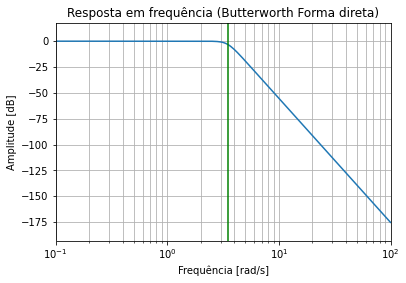

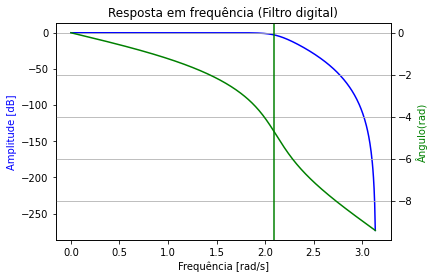

In [79]:
forma_direta(N, Wc, False)

Coeficientes com truncamento


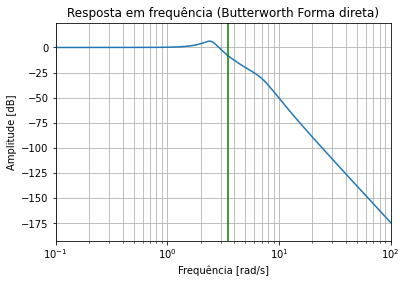

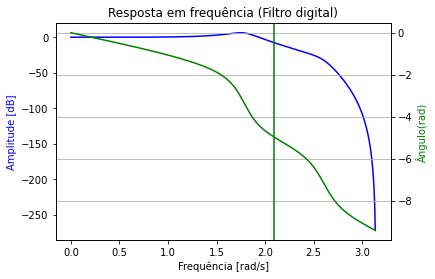

In [82]:
forma_direta(N, Wc, True, precisao_round)

## Forma em cascata

[1728.    0.    0.    0.    0.    0.    0.] [1.00000000e+00 1.33842609e+01 8.95692194e+01 3.80010014e+02
 1.07483063e+03 1.92733356e+03 1.72800000e+03]


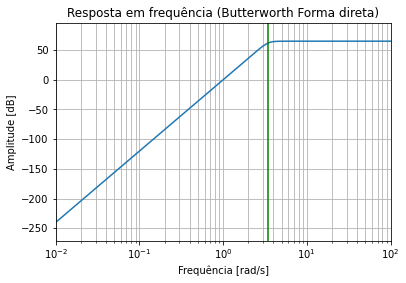

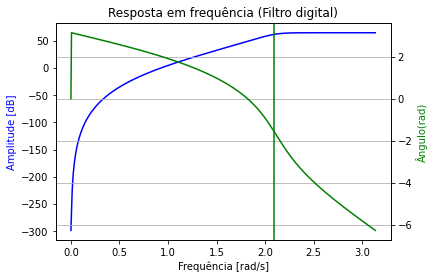

In [52]:
sos = signal.butter(N, Wn, btype='lowpass', analog=True, output='sos')
b, a = signal.sos2tf(sos)
z, p = signal.bilinear(b, a, fs=samplerate)

print(b, a)

plot_freqs(b, a, Wn)
plot_freqz(z, p, Wc)